# Projet final de Machine Learning : wifi localization

<img src="https://media.giphy.com/media/qqtvGYCjDNwac/giphy.gif" width = 300>


## Plan :

   [- Importation des packages](#0)
   
   [- Statistiques descriptives du dataset](#1)
   
   [- Naive Bayes, LDA, QDA](#2)
   
   [- kNN, arbres](#3)
    
   [- SVM](#4)
      
   [- Discussion / Conclusion](#5)

Lien vers les données: 
https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization


<a id="0"></a> 
 
# 0. Importation des packages


In [176]:
import copy

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns # pour les graphiques (boxplot etc.)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [178]:
"Pour les modèles"

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [179]:
"Pour les prédictions"

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<a id="1"></a> 
 
# 1. Statistiques descriptives du dataset (4 pts)


## Chargement du dataset

In [180]:
help(pd.read_table)

Help on function read_table in module pandas.io.parsers:

read_table(filepath_or_buffer, sep='\t', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read general delimited file into DataFrame
    
    Also supports optionally iter

In [181]:
help(list.append)

Help on method_descriptor:

append(...)
    L.append(object) -> None -- append object to end



On donne des noms aux lignes et aux colonnes du dataset wifi qu'on va charger juste après.

In [182]:
noms_cols = []
for i in range(7):
    noms_cols.append("wifi_"+ str(i+1))
noms_cols.append("room")

noms_lignes = []
for i in range(2000):
    noms_lignes.append("individu_"+ str(i+1))

Le fichier étant un .txt, on utilise la commande read_table() du package pandas.
On attribue des noms aux colonnes et aux lignes.

In [183]:
wifi = pd.read_table("wifi_localization.txt", header = None, names = noms_cols, index_col = False)
wifi.index = noms_lignes 

On affiche les 5 premières lignes du jeu de données wifi. On remarque que notre jeu de données contient 8 colonnes.

In [184]:
wifi.head()

,wifi_1,wifi_2,wifi_3,wifi_4,wifi_5,wifi_6,wifi_7,room
individu_1,-64,-56,-61,-66,-71,-82,-81,1
individu_2,-68,-57,-61,-65,-71,-85,-85,1
individu_3,-63,-60,-60,-67,-76,-85,-84,1
individu_4,-61,-60,-68,-62,-77,-90,-80,1
individu_5,-63,-65,-60,-63,-77,-81,-87,1


On affiche les 5 dernières lignes du jeu de données wifi. On remarque que notre jeu de données contient 2000 lignes.

In [185]:
wifi.tail()

,wifi_1,wifi_2,wifi_3,wifi_4,wifi_5,wifi_6,wifi_7,room
individu_1996,-59,-59,-48,-66,-50,-86,-94,4
individu_1997,-59,-56,-50,-62,-47,-87,-90,4
individu_1998,-62,-59,-46,-65,-45,-87,-88,4
individu_1999,-62,-58,-52,-61,-41,-90,-85,4
individu_2000,-59,-50,-45,-60,-45,-88,-87,4


On peut aussi utiliser directement la commande .shape pour remarquer que notre jeu de données contient 2000 lignes et 8 colonnes.

In [186]:
wifi.shape

(2000, 8)

### Création d'un nouveau dataset où on change le type de la variable room

In [187]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x0000025FF8CDD8C8>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    variables.
    


In [188]:
new_dataset = copy.deepcopy(wifi)

On convertit la variable room en chaîne de caractères sur notre copie du jeu de données initial.

In [189]:
new_dataset["room"] = new_dataset["room"].astype(str)

On change également le nom de ses modalités.

In [190]:
new_dataset["room"].replace({"1": "room_1", "2": "room_2", "3": "room_3", "4": "room_4"}, inplace=True)

On a bien modifié la variable room sur notre copie du jeu de données initial.

In [191]:
new_dataset.head()

,wifi_1,wifi_2,wifi_3,wifi_4,wifi_5,wifi_6,wifi_7,room
individu_1,-64,-56,-61,-66,-71,-82,-81,room_1
individu_2,-68,-57,-61,-65,-71,-85,-85,room_1
individu_3,-63,-60,-60,-67,-76,-85,-84,room_1
individu_4,-61,-60,-68,-62,-77,-90,-80,room_1
individu_5,-63,-65,-60,-63,-77,-81,-87,room_1


On n'a pas modifié le jeu de données initial, ce qui va nous permettre de travailler sur les deux jeux de données selon les besoins.

In [192]:
wifi.head()

,wifi_1,wifi_2,wifi_3,wifi_4,wifi_5,wifi_6,wifi_7,room
individu_1,-64,-56,-61,-66,-71,-82,-81,1
individu_2,-68,-57,-61,-65,-71,-85,-85,1
individu_3,-63,-60,-60,-67,-76,-85,-84,1
individu_4,-61,-60,-68,-62,-77,-90,-80,1
individu_5,-63,-65,-60,-63,-77,-81,-87,1


In [193]:
array = wifi.values
X = array[:,0:7]
y = array[:,7]

In [194]:
new_array = new_dataset.values
new_y = new_array[:,7]

## Boxplots de chaque variable

Pour la variable wifi_1 en fonction de room.

On remarque que la première pièce et la dernière pièce donnent des résultats assez similaires pour la variable wifi_1 (ces deux pièces ont peu d'influence sur la variable).
Par contre, dans la troisième pièce, les valeurs obtenues sont en général plus élevées.
Enfin, c'est la seconde pièce qui exerce la plus grande influence sur cette variable (les valeurs obtenues sont en générales plus élevées que dans toutes les autres pièces).

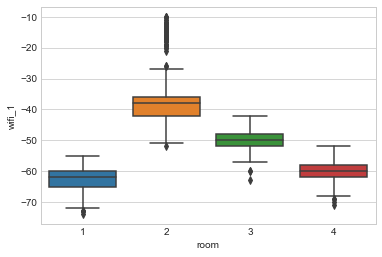

In [195]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'room', y = 'wifi_1', data = wifi) 

Pour les variables wifi_i, $2 \leqslant i \leqslant 7$ selon la variable room, via une boucle.

On remarque que la variable wifi_2 n'est que très peu influencée par la pièce où on se situe contrairement à d'autres variables telles que wifi_3 ou wifi_5.

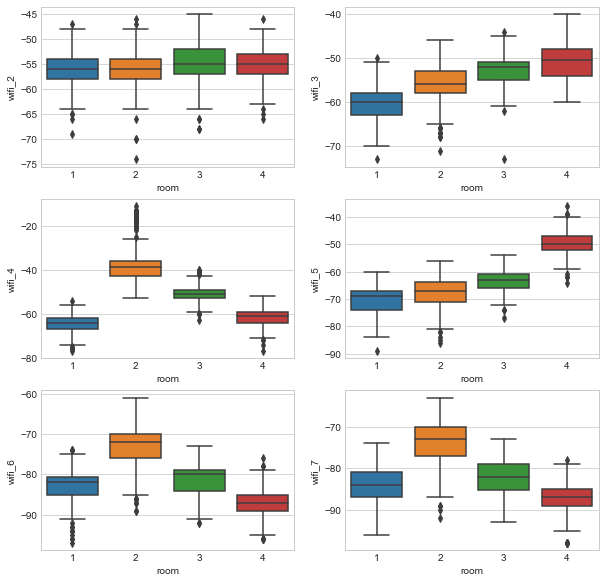

In [196]:
sns.set_style("whitegrid") 
  
plt.figure(figsize=(10,10))

for i in range(2,8):
    plt.subplot(3,2,i-1)
    sns.boxplot(x = 'room', y = 'wifi_'+ str(i), data = wifi) 

Pour les variables wifi_i, $1 \leqslant i \leqslant 7$.

Sur le jeu de données initial, la variable room est considérée comme un entier et donc une boîte à moustache est également affichée pour cette variable.

On préfère donc ici que cette variable soit traitée comme une chaîne de caractères pour ne pas l'afficher.

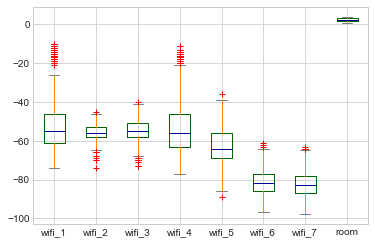

In [197]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
wifi.plot.box(color=color, sym='r+');

On utilise la copie de notre jeu de données pour afficher seulement les wifi_i, $1 \leqslant i \leqslant 7$.

On remarque que les médianes de wifi_1, wifi_2, wifi_3 et wifi_4 sont très proches mais que wifi_2 et wifi_3 ont des valeurs bien plus concentrées autour de la médiane que les deux autres.

De plus, wifi_6 et wifi_7 prennent généralement des valeurs bien plus faibles que les autres variables.

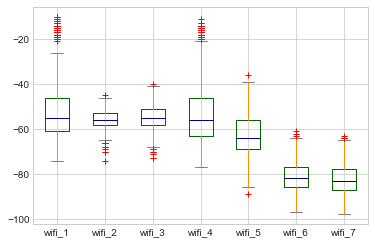

In [198]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
new_dataset.plot.box(color=color, sym='r+');

## Histogrammes

Pour la variable wifi_1. On remarque que plus de la moitié des individus sont situés entre -70 et -50.

(array([ 41., 416., 555., 351., 232., 301.,  40.,   5.,  30.,  29.]),
 array([-74. , -67.6, -61.2, -54.8, -48.4, -42. , -35.6, -29.2, -22.8,
        -16.4, -10. ]),
 <a list of 10 Patch objects>)

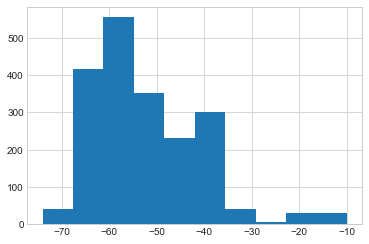

In [199]:
plt.hist(wifi.iloc[:,0])

Pour les variables wifi_i, $2 \leqslant i \leqslant 7$, via une boucle.

On remarque que les valeurs prises par les variables wifi_6 et wifi_7 sont généralement bien plus faibles que les autres variables, ce qui rejoint ce qu'on avait constaté sur les boxplots.

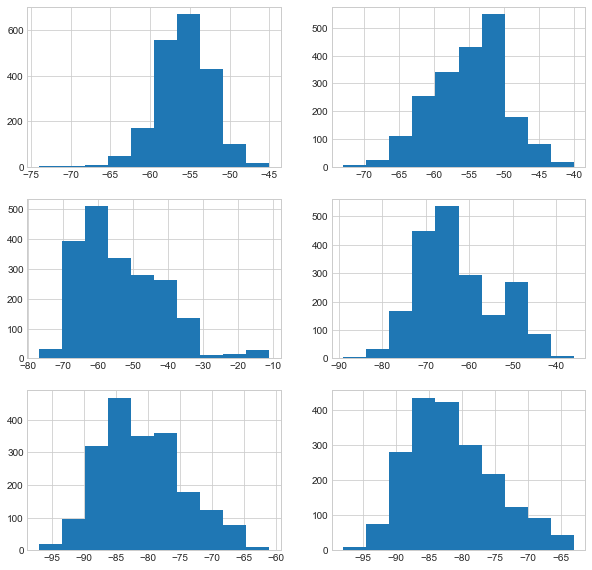

In [200]:
plt.figure(figsize=(10,10))

for i in range(1,7):
    plt.subplot(3,2,i)
    plt.hist(wifi.iloc[:,i])

## Matrice de corrélation

On affiche la matrice de corrélation entre les variables.

In [201]:
correlation_matrix = new_dataset.corr() # sans la variable room
correlation_matrix_room = wifi.corr() # avec la variable room

print(correlation_matrix)
print("\n")

print(correlation_matrix_room)

          wifi_1    wifi_2    wifi_3    wifi_4    wifi_5    wifi_6    wifi_7
wifi_1  1.000000 -0.003298  0.050814  0.921025 -0.244932  0.718429  0.686955
wifi_2 -0.003298  1.000000  0.282211  0.014604  0.200469  0.074002  0.048336
wifi_3  0.050814  0.282211  1.000000  0.078292  0.618984 -0.091622 -0.073141
wifi_4  0.921025  0.014604  0.078292  1.000000 -0.236021  0.706039  0.673294
wifi_5 -0.244932  0.200469  0.618984 -0.236021  1.000000 -0.416049 -0.361621
wifi_6  0.718429  0.074002 -0.091622  0.706039 -0.416049  1.000000  0.723172
wifi_7  0.686955  0.048336 -0.073141  0.673294 -0.361621  0.723172  1.000000


          wifi_1    wifi_2    wifi_3    wifi_4    wifi_5    wifi_6    wifi_7  \
wifi_1  1.000000 -0.003298  0.050814  0.921025 -0.244932  0.718429  0.686955   
wifi_2 -0.003298  1.000000  0.282211  0.014604  0.200469  0.074002  0.048336   
wifi_3  0.050814  0.282211  1.000000  0.078292  0.618984 -0.091622 -0.073141   
wifi_4  0.921025  0.014604  0.078292  1.000000 -0.236021  0.70

In [202]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

On obtient un meilleur rendu avec le package seaborn.

On constate que les variables wifi_1 et wifi_4 sont corrélées positivement (corrélation = 0.92).
Il a également une corrélation positive entre les variables wifi_1 et wifi_6 (corrélation = 0.72) et entre les variables wifi_1 et wifi_7 (corrélation = 0.69) mais ces corrélations sont plus faibles.

On peut également noter une corrélation positive entre les variables wifi_4 et wifi_6 (corrélation = 0.71) et entre les variables wifi_6 et wifi_7 (corrélation = 0.72).

Enfin, il y a une corrélation positive entre les variables wifi_3 et wifi_5 (corrélation = 0.62) et entre les variables wifi_4 et wifi_7 (corrélation = 0.67) mais ces corrélations sont plus faibles.

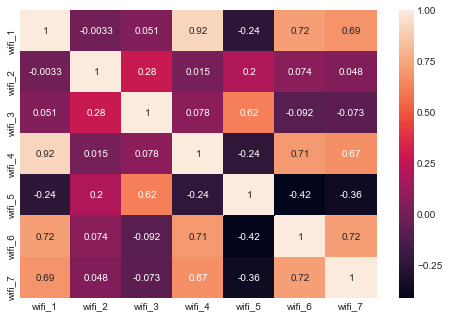

In [203]:
plt.figure(figsize=(8,5.3))

sns.heatmap(correlation_matrix, annot=True)

On constate ici que les variables wifi_3 et room et les variables wifi_5 et room sont corrélées positivement (corrélation = 0.69 et corrélation = 0.82 respectivement) comme le suggéraient les boxplots affichés précédemment.

On note aussi que la corrélation est plus élevée entre les variables wifi_5 et room qu'entre les variables wifi_3 et room.

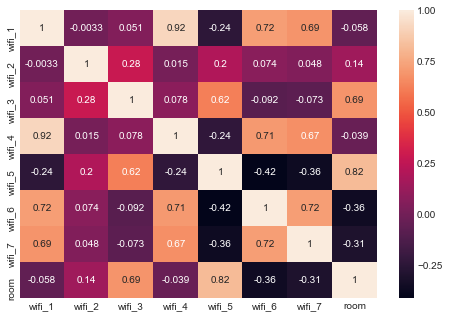

In [204]:
plt.figure(figsize=(8,5.3))

sns.heatmap(correlation_matrix_room, annot=True)

## Séparation en train / test

In [205]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int, None, optional
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, the value is set 

On sépare le jeu de données en deux ensembles (train et test), en choisissant stratify = y pour qu'on ait 50% des données de chaque label dans le train et le test de manière aléatoire.

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, shuffle=True, stratify = y)

In [207]:
help(np.ndarray)

Help on class ndarray in module numpy:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |

On a donc bien séparé le jeu de données en deux ensemble (train et test) de taille identique avec 50% des données de chaque label dans le train et le test de manière aléatoire.

In [208]:
print("Dimension de X_train:", X_train.shape)
print("Dimension de X_test:", X_test.shape)
print("\n")

print("Nombre d'éléments de y_train:", y_train.size)
print("Nombre d'éléments de y_test:", y_test.size)
print("\n")

for i in range(1,5):
    print("Nombre de room_"+str(i)+" dans le train:",(y_train==i).sum())
    print("Nombre de room_"+str(i)+" dans le test:",(y_test==i).sum())
    print("\n")

Dimension de X_train: (1000, 7)
Dimension de X_test: (1000, 7)


Nombre d'éléments de y_train: 1000
Nombre d'éléments de y_test: 1000


Nombre de room_1 dans le train: 250
Nombre de room_1 dans le test: 250


Nombre de room_2 dans le train: 250
Nombre de room_2 dans le test: 250


Nombre de room_3 dans le train: 250
Nombre de room_3 dans le test: 250


Nombre de room_4 dans le train: 250
Nombre de room_4 dans le test: 250




<a id="2"></a> 
 
# 2. Naive Bayes, LDA, QDA (1 + 1 + 1 pts)


## Naive Bayes

Sur ce premier essai, on obtient de très bonnes performances avec Naive Bayes.

En effet, on a une accuracy de 98,3%. De plus, tous les labels 1 (de la variable room) sont bien classées et seuls deux individus sont mal classés pour les labels 3 et 4.
Néanmoins, on a fait davantage d'erreurs sur le label 2 où 13 individus sont classés en 3 au lieu de 2.

In [209]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
prediction_NB = model_NB.predict(X_test)

# Accuracy
print("accuracy =", accuracy_score(y_test, prediction_NB), "\n")
# Matrice de confusion
print(confusion_matrix(y_test, prediction_NB), "\n")
# Cette ligne renvoie des indicateurs de qualité du modèle (precision, recall...)
print(classification_report(y_test, prediction_NB))

accuracy = 0.983 

[[250   0   0   0]
 [  0 237  13   0]
 [  1   0 248   1]
 [  1   0   1 248]] 

             precision    recall  f1-score   support

          1       0.99      1.00      1.00       250
          2       1.00      0.95      0.97       250
          3       0.95      0.99      0.97       250
          4       1.00      0.99      0.99       250

avg / total       0.98      0.98      0.98      1000



## LDA

Sur ce premier essai, on constate que le modèle LDA est globalement moins performant que le modèle Naive Bayes.

En effet, l'accuracy est plus faible : 96,4% et on se trompe davantage sur les labels 1, 2 et 4 de la variable room (4 erreurs, 25 erreurs et 6 erreurs respectivement). Seul le label 3 est mieux classé (une erreur au lieu de deux précédemment).

In [210]:
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train, y_train)
prediction_LDA = model_LDA.predict(X_test)

print("accuracy =", accuracy_score(y_test, prediction_LDA), "\n")
print(confusion_matrix(y_test, prediction_LDA), "\n")
print(classification_report(y_test, prediction_LDA))

accuracy = 0.964 

[[246   0   4   0]
 [  0 225  25   0]
 [  0   0 249   1]
 [  0   0   6 244]] 

             precision    recall  f1-score   support

          1       1.00      0.98      0.99       250
          2       1.00      0.90      0.95       250
          3       0.88      1.00      0.93       250
          4       1.00      0.98      0.99       250

avg / total       0.97      0.96      0.96      1000



## QDA

Sur ce premier essai, le modèle QDA donne globalement de meilleurs résultats que le modèle LDA.

En effet, on obtient une accuracy de 98.1% et tous les labels 1 de la variable room sont bien classés.

On a également moins d'erreurs sur les labels 2 et 4 par rapport au modèle LDA.

Notons que le label 2 est mieux classé pour le modèle QDA (9 erreurs) que pour le modèle Naive Bayes (13 erreurs).

Néanmoins, le modèle Naive Bayes classe mieux les labels 3 et 4.

In [211]:
model_QDA = QuadraticDiscriminantAnalysis()
model_QDA.fit(X_train, y_train)
prediction_QDA = model_QDA.predict(X_test)

print("accuracy =", accuracy_score(y_test, prediction_QDA), "\n") # accuracy
print(confusion_matrix(y_test, prediction_QDA), "\n")
print(classification_report(y_test, prediction_QDA))

accuracy = 0.981 

[[250   0   0   0]
 [  0 241   9   0]
 [  1   3 243   3]
 [  1   0   2 247]] 

             precision    recall  f1-score   support

          1       0.99      1.00      1.00       250
          2       0.99      0.96      0.98       250
          3       0.96      0.97      0.96       250
          4       0.99      0.99      0.99       250

avg / total       0.98      0.98      0.98      1000



## Nouveaux essais pour les 3 modèles

On va stocker les modèles, les prédictions et les accuracy sur le test obtenues dans une liste.

In [212]:
models_NB = []
models_LDA = []
models_QDA = []

predictions_NB = []
predictions_LDA = []
predictions_QDA = []

results_accuracy_NB = []
results_accuracy_LDA = []
results_accuracy_QDA = []

On répète le découpage aléatoire 20 fois et on crée un modèle Naive Bayes, un modèle LDA et un modèle QDA à chaque itération.

On retire le random_state = 1 pour ne pas avoir les mêmes modèles à chaque itération.

A chaque itération, on stocke les valeurs prédites par chaque modèle dans une liste.

On s'en sert ensuite pour calculer l'accuracy sur le test pour chaque modèle, qu'on stocke également dans une liste.

In [213]:
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state = None, shuffle=True, stratify = y)
    models_NB.append(GaussianNB())
    models_NB[i].fit(X_train, y_train)
    predictions_NB.append(models_NB[i].predict(X_test))
    results_accuracy_NB.append(accuracy_score(y_test, predictions_NB[i]))
    models_LDA.append(LinearDiscriminantAnalysis())
    models_LDA[i].fit(X_train, y_train)
    predictions_LDA.append(models_LDA[i].predict(X_test))
    results_accuracy_LDA.append(accuracy_score(y_test, predictions_LDA[i]))
    models_QDA.append(QuadraticDiscriminantAnalysis())
    models_QDA[i].fit(X_train, y_train)
    predictions_QDA.append(models_QDA[i].predict(X_test))
    results_accuracy_QDA.append(accuracy_score(y_test, predictions_QDA[i]))

On affiche les résultats obtenues pour les modèles Naive Bayes.

In [214]:
print(results_accuracy_NB)

[0.98, 0.984, 0.982, 0.985, 0.983, 0.984, 0.987, 0.982, 0.985, 0.981, 0.981, 0.984, 0.985, 0.984, 0.988, 0.982, 0.98, 0.982, 0.985, 0.981]


On affiche les résultats obtenues pour les modèles LDA.

In [215]:
print(results_accuracy_LDA)

[0.975, 0.971, 0.973, 0.974, 0.965, 0.969, 0.973, 0.967, 0.972, 0.969, 0.971, 0.972, 0.969, 0.97, 0.976, 0.97, 0.958, 0.97, 0.975, 0.972]


On affiche les résultats obtenues pour les modèles QDA.

In [216]:
print(results_accuracy_QDA)

[0.975, 0.981, 0.976, 0.982, 0.98, 0.981, 0.973, 0.982, 0.98, 0.98, 0.981, 0.982, 0.978, 0.98, 0.982, 0.982, 0.977, 0.977, 0.978, 0.98]


On stocke nos résultats obtenus dans un DataFrame.

In [217]:
results_accuracy_df = np.array([results_accuracy_NB, results_accuracy_LDA, results_accuracy_QDA])
results_accuracy_df = results_accuracy_df.reshape(20,3)

lignes = []

for i in range(20):
    lignes.append("Model_"+str(i+1))

results_accuracy_df = pd.DataFrame(results_accuracy_df, index = lignes, columns = ["NB", "LDA", "QDA"])

On affiche le DataFrame obtenu.

In [218]:
results_accuracy_df

,NB,LDA,QDA
Model_1,0.980,0.984,0.982
Model_2,0.985,0.983,0.984
Model_3,0.987,0.982,0.985
Model_4,0.981,0.981,0.984
Model_5,0.985,0.984,0.988
Model_6,0.982,0.980,0.982
Model_7,0.985,0.981,0.975
Model_8,0.971,0.973,0.974
Model_9,0.965,0.969,0.973
Model_10,0.967,0.972,0.969


In [219]:
mean_accuracy_NB = sum(results_accuracy_NB)/len(results_accuracy_NB)
mean_accuracy_LDA = sum(results_accuracy_LDA)/len(results_accuracy_LDA)
mean_accuracy_QDA = sum(results_accuracy_QDA)/len(results_accuracy_QDA)

In [220]:
mean_accuracy = np.array((mean_accuracy_NB, mean_accuracy_LDA, mean_accuracy_QDA))
mean_accuracy = pd.DataFrame(mean_accuracy, index = ["NB", "LDA", "QDA"], columns = ["accuracy"])
mean_accuracy = mean_accuracy.transpose()

En moyenne, le modèle Naive Bayes a la meilleure accuracy parmi les trois modèles, suivi du modèle QDA puis du modèle LDA.

In [221]:
mean_accuracy

,NB,LDA,QDA
accuracy,0.98325,0.97055,0.97935


On va maintenant afficher nos résultats sous forme de boxplots.

In [222]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue``

On essaye d'abord avec sns.boxplot mais il serait préférable de faire un seul graphique regroupant les trois boxplots pour faciliter l'interprétation.

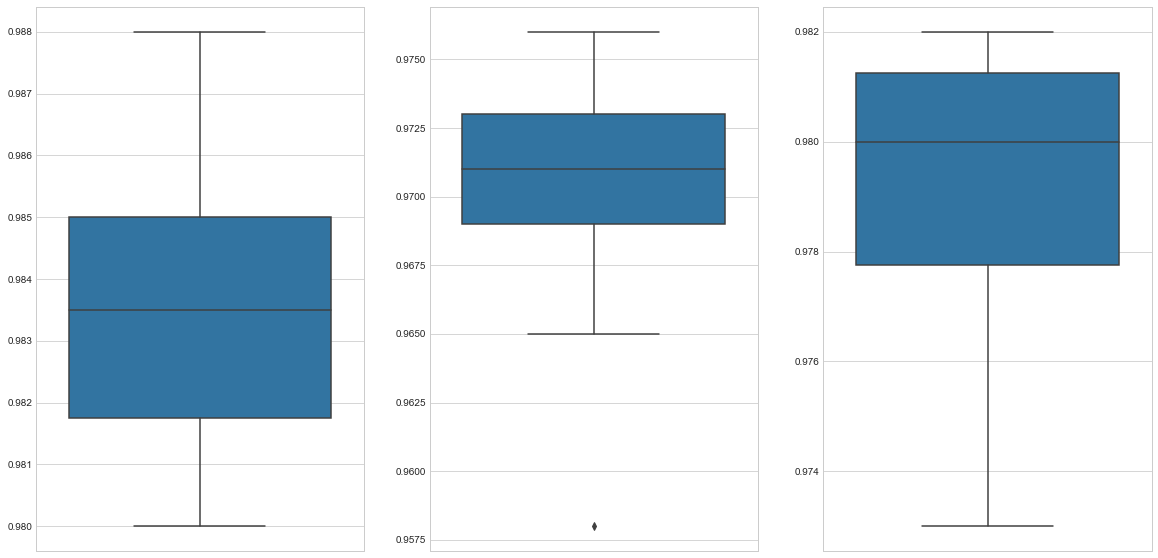

In [223]:
sns.set_style("whitegrid") 
  
plt.figure(figsize=(20,10))

#plt.subplot(3,1,1)
plt.subplot(1,3,1)
sns.boxplot(results_accuracy_NB, orient="v")

#plt.subplot(3,1,2)
plt.subplot(1,3,2)
sns.boxplot(results_accuracy_LDA, orient="v")

#plt.subplot(3,1,3)
plt.subplot(1,3,3)
sns.boxplot(results_accuracy_QDA, orient="v")

On passe donc par results_accuracy_df pour obtenir un affichage plus lisible.

On remarque que c'est le modèle Naive Bayes qui a la plus grande médiane et le plus grand troisième quartile.

Dans au moins 50% des cas, on a une accuracy inférieure ou égale à 98% avec le modèle Naive Bayes.

Néanmoins, le modèle QDA a un intervalle interquartile plus petit que les deux autres modèles donc les accuracy obtenues via ce modèle sont en général davantage concentrées autour de la médiane. De plus, sa médiane est égale à celle du modèle Naive Bayes.

A contrario, le modèle Naive Bayes est celui dont l'intervalle interquartile est le plus grand.

L'accuracy obtenue a donc plus de chance d'être éloignée de la médiane par rapport aux deux autres modèles.

Pour décider quel modèle est le meilleur parmi les trois en terme d'accuracy, je pense que cela dépend de ce que l'on cherche.
Si l'on souhaite avoir un modèle qui donne généralement une accuracy proche de la valeur médiane, il vaut mieux choisir le QDA. Vient ensuite le modèle LDA, puis le modèle Naive Bayes.

Si l'on souhaite avoir un modèle qui une accuracy plus grande que les deux autres modèles en moyenne, il vaut mieux choisir le modèle Naive Bayes. Vient ensuite le modèle QDA, puis le modèle LDA.

Au final, je pense que globalement, c'est le modèle Naive Bayes qui est le meilleur parmi les trois sur notre jeu de données.

Remarque: Si l'accuracy moyenne est toujours en faveur de Naive Bayes lorsque je refais plusieurs fois les calculs, pour les boxplots la tendance est moins claire. Parfois c'est le modèle Naive Bayes qui a un intervalle interquartile plus petit que les deux autres par exemple.
Je trouve que cela rend la comparaison entre ces trois modèles via les boxplots difficile.

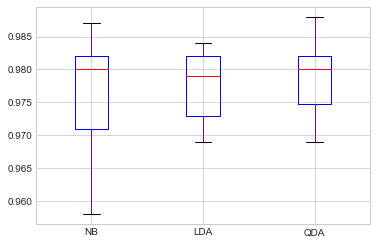

In [224]:
color = dict(boxes='Blue', whiskers='Purple', medians='Red', caps='Black')
results_accuracy_df.plot.box(color=color, sym='r+');

### Conclusion de cette partie

On peut conclure que parmi ces trois modèles, le modèle Naive Bayes semble le plus approprié à notre jeu de données.

En effet, il donne une meilleure accuracy que les deux autres modèles en moyenne.

De plus, l'accuracy médiane est supérieure à celle du modèle LDA et égale à celle du modèle QDA.

Néanmoins, l'intervalle interquartile est plus grand que celui des deux autres modèles ce qui donne un encadrement moins intéressant de l'accuracy obtenue.

## 10-fold Cross-Validation pour le modèle Naive Bayes

On va maintenant essayer de retrouver le résultat obtenu dans l'article pour le modèle Naive Bayes.

Les auteurs de l'article ont utilisé un 10-fold Cross-Validation sur les données et ont indiqué l'accuracy moyenne obtenue sur les 10 essais.

In [50]:
help(StratifiedKFold)

Help on class StratifiedKFold in module sklearn.model_selection._split:

class StratifiedKFold(_BaseKFold)
 |  Stratified K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets.
 |  
 |  This cross-validation object is a variation of KFold that returns
 |  stratified folds. The folds are made by preserving the percentage of
 |  samples for each class.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle each stratification of the data before splitting
 |      into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState instance, random_state is the random number generator;
 |      If None, the random number generator is the RandomSt

In [51]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be for example a list, or an array.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set.
    
    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentation) or
        a scorer callable obje

On utilise la fonction SratifiedKFold pour faire notre 10-Fold Cross-Validation avec le même pourcentage de chaque label dans chaque sous ensemble du jeu de données. On indique shuffle = True pour que les données soient mélangées avant la séparation.

On donne X et y en paramètres de cross_val_score et non X_train et y_train car la séparation en train / test est faite durant la Cross-Validation.

On obtient ici une accuracy moyenne d'environ 98.3% ce qui est bien plus élevé que les résultats obtenus dans l'article.

Je ne comprends pas pourquoi ils ont obtenu une accuracy plus faible.

In [52]:
NB_results_accuracy = []
NB_results_accuracy_v2 = []

In [53]:
skf = StratifiedKFold(n_splits=10, shuffle = True)

NB_results_accuracy = cross_val_score(GaussianNB(), X, y, cv=skf, scoring='accuracy')

print("Accuracy: %0.4f (+/- %0.4f)" % (NB_results_accuracy.mean(), NB_results_accuracy.std() * 2))

Accuracy: 0.9835 (+/- 0.0162)


On peut refaire le calcul avec cross_validate.

Cela va me permettre de vérifier si c'est bien l'accuracy sur le test qui est affichée par le calcul précédent, et non sur le train.

In [54]:
NB_results_accuracy_v2 = cross_validate(GaussianNB(), X, y, cv=skf, scoring='accuracy')

On obtient des résultats similaires à ceux obtenus avec cross_val_score.

J'en conclus que c'était bien l'accuracy du test qui était affichée précédemment.

In [55]:
print("Accuracy: %0.4f (+/- %0.4f)" % (NB_results_accuracy_v2["test_score"].mean(), NB_results_accuracy_v2["test_score"].std() * 2))

Accuracy: 0.9845 (+/- 0.0070)


Au final, j'obtiens toujours un accuracy moyenne plus élevée que celle obtenue dans l'article.

Je ne comprends pas d'où vient la différence.

<a id="3"></a> 
 
# 3. kNN, arbres (2 + 1 pts)


## kNN

On sépare le jeu de données en deux ensembles (train et test), comme précédemment (partie 1.).

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, shuffle=True, stratify = y)

On va créer des modèles kNN, en faisant varier k, pour essayer de trouver le k optimal.

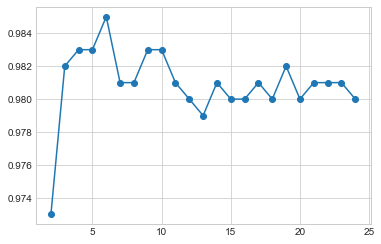

In [57]:
models_kNN = []
predictions_kNN = []
kNN_accuracy = []

for i in range(2,25):
    models_kNN.append(KNeighborsClassifier(i))
    models_kNN[i-2].fit(X_train, y_train)
    predictions_kNN.append(models_kNN[i-2].predict(X_test))
    kNN_accuracy.append(accuracy_score(y_test, predictions_kNN[i-2]))

plt.plot(range(2,25), kNN_accuracy, 'o-')
plt.show()

On affiche l'indice de la liste où l'accuracy est maximale. On obtient 4.

Le modèle correspondant est le modèle avec 2 + 4 = 6 voisins car l'indice 0 correspond à 2 voisins.

In [102]:
indice_voisins_optimal = np.argmax(kNN_accuracy)
print(indice_voisins_optimal)
nombre_voisins_optimal = np.argmax(kNN_accuracy) + 2
print("Nombre de voisins optimal:", nombre_voisins_optimal)

4
Nombre de voisins optimal: 6


On a une accuracy de 98,5% avec ce modèle.
C'est mieux qu'avec Naive Bayes, LDA, et QDA lors de notre premier essai dans la partie 2.

In [105]:
kNN_accuracy[indice_voisins_optimal]

0.985

On remarque que tous les labels 1 sont bien classés.

De plus, on se trompe seulement 3 fois sur le label 4 et 4 fois sur le label 3.

Par contre, on se trompe 8 fois sur label 2.

Remarquons qu'à notre premier essai sur les modèles Naive Bayes, LDA et QDA dans la partie 2, on se trompait davantage sur le label 2.

De plus, ici, on se trompe autant que le modèle QDA sur le label 4 (3 erreurs), c'est donc moins que le modèle LDA mais plus que le modèle Naive Bayes.

Enfin, concernant le label 3, on fait seulement mieux que le modèle QDA, donc on est moins performant que les modèles LDA et Naive Bayes sur ce label (car ces derniers faisaient moins d'erreurs que le QDA sur ce label).

In [106]:
print("accuracy =", accuracy_score(y_test, predictions_kNN[indice_voisins_optimal]), "\n")
print(confusion_matrix(y_test, predictions_kNN[indice_voisins_optimal]), "\n")
print(classification_report(y_test, predictions_kNN[indice_voisins_optimal]))

accuracy = 0.985 

[[250   0   0   0]
 [  0 242   8   0]
 [  1   2 246   1]
 [  1   0   2 247]] 

             precision    recall  f1-score   support

          1       0.99      1.00      1.00       250
          2       0.99      0.97      0.98       250
          3       0.96      0.98      0.97       250
          4       1.00      0.99      0.99       250

avg / total       0.99      0.98      0.99      1000



### kNN avec 10-fold Cross-Validation

On va faire un essai avec un 10-fold Cross-Validation pour le modèle kNN avec 6 voisins.

In [107]:
kNN_results_accuracy = []
kNN_results_accuracy_v2 = []

In [110]:
skf = StratifiedKFold(n_splits=10, shuffle = True)

kNN_results_accuracy = cross_val_score(KNeighborsClassifier(nombre_voisins_optimal), X, y, cv=skf, scoring='accuracy')

print("Accuracy: %0.4f (+/- %0.4f)" % (kNN_results_accuracy.mean(), kNN_results_accuracy.std() * 2))

Accuracy: 0.9865 (+/- 0.0224)


In [111]:
skf = StratifiedKFold(n_splits=10, shuffle = True)

kNN_results_accuracy_v2 = cross_validate(KNeighborsClassifier(nombre_voisins_optimal), X, y, cv=skf, scoring='accuracy')

print("Accuracy: %0.4f (+/- %0.4f)" % (kNN_results_accuracy_v2["test_score"].mean(), kNN_results_accuracy_v2["test_score"].std() * 2))

Accuracy: 0.9865 (+/- 0.0142)


Au final, en passant par un 10-fold Cross-Validation, on obtient une accuracy moyenne qui est similaire (ou légèrement supérieure) que l'accuracy obtenue précédemment, pour le modèle kNN avec 6 voisins.

## Decision Tree (indice de Gini)

In [64]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int or None, optional (default=None)
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int, float, optional (default=2)

On utilise ici l'indice de Gini pour calculer l'homogénéité. 

C'est le critère par défaut donc on était pas obligé de mettre le paramètre criterion = "gini".

Sur ce premier essai, on obtient globalement une moins bonne performance qu'avec le modèle Naive Bayes.

En effet, l'accuracy est plus faible : 96.5% et on se trompe davantage sur tout les labels.

De même, on obtient une moins bonne performance que le modèle kNN avec 6 voisins car on a une accuracy plus faible et on se trompe davantage sur tout les labels, sauf le 4 où on fait le même nombre d'erreurs.

In [65]:
model_DT_Gini = DecisionTreeClassifier(criterion = "gini")
model_DT_Gini.fit(X_train, y_train)
prediction_DT_Gini = model_DT_Gini.predict(X_test)

print("accuracy =", accuracy_score(y_test, prediction_DT_Gini), "\n")
print(confusion_matrix(y_test, prediction_DT_Gini), "\n")
print(classification_report(y_test, prediction_DT_Gini))

accuracy = 0.967 

[[250   0   0   0]
 [  0 237  13   0]
 [  1  14 233   2]
 [  2   0   1 247]] 

             precision    recall  f1-score   support

          1       0.99      1.00      0.99       250
          2       0.94      0.95      0.95       250
          3       0.94      0.93      0.94       250
          4       0.99      0.99      0.99       250

avg / total       0.97      0.97      0.97      1000



## Decision Tree (entropie)

On obtient un meilleur résultat en terme d'accuracy en choisissant l'entropie plutôt que l'indice de Gini pour le calcul de l'homogénéité.

De plus, tout les labels 1 sont bien classés et on fait moins d'erreurs sur le label 2.

Par contre, on fait une erreur de plus pour le label 3.

Enfin, on est toujours moins bon que le kNN avec 6 voisins car on fait ici plus d'erreurs sur le label 3 que ce modèle.

In [66]:
model_DT_entropy = DecisionTreeClassifier(criterion = "entropy")
model_DT_entropy.fit(X_train, y_train)
prediction_DT_entropy = model_DT_entropy.predict(X_test)

print("accuracy =", accuracy_score(y_test, prediction_DT_entropy), "\n")
print(confusion_matrix(y_test, prediction_DT_entropy), "\n")
print(classification_report(y_test, prediction_DT_entropy))

accuracy = 0.968 

[[248   0   0   2]
 [  0 241   9   0]
 [  2  12 233   3]
 [  3   0   1 246]] 

             precision    recall  f1-score   support

          1       0.98      0.99      0.99       250
          2       0.95      0.96      0.96       250
          3       0.96      0.93      0.95       250
          4       0.98      0.98      0.98       250

avg / total       0.97      0.97      0.97      1000



### Decision Tree avec 10-fold Cross-Validation

On va faire un essai avec un 10-fold Cross-Validation pour le modèle Decision Tree.

In [67]:
DT_Gini_results_accuracy = []
DT_Gini_results_accuracy_v2 = []

DT_entropy_results_accuracy = []
DT_entropy_results_accuracy_v2 = []

In [68]:
skf = StratifiedKFold(n_splits=10, shuffle = True)

DT_Gini_results_accuracy = cross_val_score(DecisionTreeClassifier(criterion = "gini"), X, y, cv=skf, scoring='accuracy')
DT_entropy_results_accuracy = cross_val_score(DecisionTreeClassifier(criterion = "entropy"), X, y, cv=skf, scoring='accuracy')

print("Accuracy (Gini): %0.4f (+/- %0.4f)" % (DT_Gini_results_accuracy.mean(), DT_Gini_results_accuracy.std() * 2))
print("Accuracy (entropy): %0.4f (+/- %0.4f)" % (DT_entropy_results_accuracy.mean(), DT_entropy_results_accuracy.std() * 2))

Accuracy (Gini): 0.9715 (+/- 0.0326)
Accuracy (entropy): 0.9730 (+/- 0.0201)


In [69]:
skf = StratifiedKFold(n_splits=10, shuffle = True)

DT_Gini_results_accuracy_v2 = cross_validate(DecisionTreeClassifier(criterion = "gini"), X, y, cv=skf, scoring='accuracy')
DT_entropy_results_accuracy_v2 = cross_validate(DecisionTreeClassifier(criterion = "entropy"), X, y, cv=skf, scoring='accuracy')

print("Accuracy (Gini): %0.4f (+/- %0.4f)" % (DT_Gini_results_accuracy_v2["test_score"].mean(), DT_Gini_results_accuracy_v2["test_score"].std() * 2))
print("Accuracy (entropy): %0.4f (+/- %0.4f)" % (DT_entropy_results_accuracy_v2["test_score"].mean(), DT_entropy_results_accuracy_v2["test_score"].std() * 2))

Accuracy (Gini): 0.9700 (+/- 0.0265)
Accuracy (entropy): 0.9730 (+/- 0.0191)


Au final, en passant par un 10-fold Cross-Validation, on obtient une accuracy moyenne qui est similaire (ou légèrement inférieure) que l'accuracy obtenue précédemment pour le modèle Decision Tree avec l'entropie. 

Pour le modèle Dection Tree avec l'indice de Gini, on obtient une accuracy moyenne qui est supérieure à l'accuracy obtenue précédemment.

Néanmoins, on remarque que cette accuracy moyenne est tout de même inférieure à celle obtenue avec le kNN à 6 voisins par la même démarche.

### Conclusion de cette partie

On conclut qu'entre le modèle kNN (avec 6 voisins) et le modèle Decision Tree, c'est le modèle kNN (avec 6 voisins) qui est le plus adapté ici.

Concernant le ten-fold Cross-Validation, de ce que j'ai compris, cette technique est utilisée pour éviter le sur-apprentissage sur notre jeu de données et obtenir une estimation de l'accuracy (ou d'un autre indicateur de qualité du modèle) à laquelle on peut s'attendre lorsque l'on sépare bien le jeu de données.

Ainsi, le but d'un ten-fold Cross-Validation n'est pas d'augmenter mais d'estimer l'accuracy d'un algorithme de machine learning.

<a id="4"></a> 
 
# 4. SVM (5 pts)

## Noyau linéaire

In [70]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

In [71]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke

In [72]:
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

In [73]:
help(np.logspace)

Help on function logspace in module numpy.core.function_base:

logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
    Return numbers spaced evenly on a log scale.
    
    In linear space, the sequence starts at ``base ** start``
    (`base` to the power of `start`) and ends with ``base ** stop``
    (see `endpoint` below).
    
    Parameters
    ----------
    start : float
        ``base ** start`` is the starting value of the sequence.
    stop : float
        ``base ** stop`` is the final value of the sequence, unless `endpoint`
        is False.  In that case, ``num + 1`` values are spaced over the
        interval in log-space, of which all but the last (a sequence of
        length `num`) are returned.
    num : integer, optional
        Number of samples to generate.  Default is 50.
    endpoint : boolean, optional
        If true, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    base : float, optional
        The base of 

### Premier essai

On stocke toutes les valeurs de $C$ qu'on va tester dans une liste.

In [74]:
C_list_linear = np.linspace(0.01, 1.0, 10**2)
print(C_list_linear)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


On va utiliser la fonction GridSearchCV pour parcourir toutes les valeurs de $C$ de la liste et choisir celui qui est optimal pour notre modèle.

On choisit un 10-fold Cross-Validation pour suivre la démarche de l'article.

Au préalable, on veille à stocker la liste des paramètres $C$ dans un dictionnaire.

Lors du fit, on insère le jeu de données dans son ensemble, car la séparation en train / test est effectuée dans GridSearchCV par 10-fold Cross-Validation.

Si on souhaite avoir l'accuracy sur le train, on peut la récupérer avec le paramètre: return_train_score = True de GridSearchCV, ce que je n'ai pas fait ici car seul le score sur le test m'intéresse, pour le comparer avec les résultats de l'article.

In [75]:
parameters_linear = {'C': C_list_linear}
skf = StratifiedKFold(n_splits=10, shuffle = True)
model_SVM_linear = SVC(kernel = "linear")
grid_SVM_linear = GridSearchCV(estimator=model_SVM_linear, param_grid=parameters_linear, scoring = 'accuracy', cv = skf)
grid_SVM_linear.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.01, 0.02, ..., 0.99, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

On affiche la meilleure accuracy moyenne obtenue sur le test, le (premier) $C$ qui réalise ce maximum et le modèle SVM correspondant.

In [76]:
print("Meilleure accuracy moyenne obtenue sur le test:",grid_SVM_linear.best_score_, "\n")
print("Paramètre optimal:",grid_SVM_linear.best_params_, "\n")
print("Modèle correspondant:\n", grid_SVM_linear.best_estimator_)

Meilleure accuracy moyenne obtenue sur le test: 0.9825 

Paramètre optimal: {'C': 0.01} 

Modèle correspondant:
 SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


On affiche l'accuracy moyenne sur le test obtenue pour chaque $C$ de la liste.

Si on cherche le premier $C$ optimal "à la main", on obtient le même résultat que précédemment (ce qui confirme bien que c'était le premier $C$ optimal qui était retourné par grid_SVM_linear.best_params_).

In [77]:
results_SVM_linear = grid_SVM_linear.cv_results_
print(results_SVM_linear['mean_test_score'], "\n")

print("Premier indice de la liste qui réalise le maximum:", np.argmax(results_SVM_linear['mean_test_score']),"\n")
print("C correspondant:", C_list_linear[np.argmax(results_SVM_linear['mean_test_score'])])

[0.9825 0.982  0.981  0.98   0.9795 0.9805 0.981  0.981  0.9805 0.9795
 0.9795 0.9795 0.9795 0.98   0.98   0.98   0.9795 0.9795 0.9795 0.9795
 0.9795 0.9795 0.9795 0.979  0.9785 0.9785 0.9785 0.9785 0.9785 0.9785
 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785
 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785
 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.9785 0.979  0.979
 0.979  0.979  0.9795 0.9795 0.9795 0.9795 0.9795 0.9795 0.9795 0.9795
 0.9795 0.9795 0.9795 0.9795 0.9795 0.9795 0.9795 0.9795 0.9795 0.9795
 0.9795 0.9795 0.9795 0.9795 0.979  0.979  0.979  0.979  0.979  0.979
 0.979  0.979  0.979  0.979  0.979  0.979  0.979  0.979  0.979  0.979 ] 

Premier indice de la liste qui réalise le maximum: 0 

C correspondant: 0.01


On trace la courbe de l'accuracy moyenne sur le test en fonction de $C$.

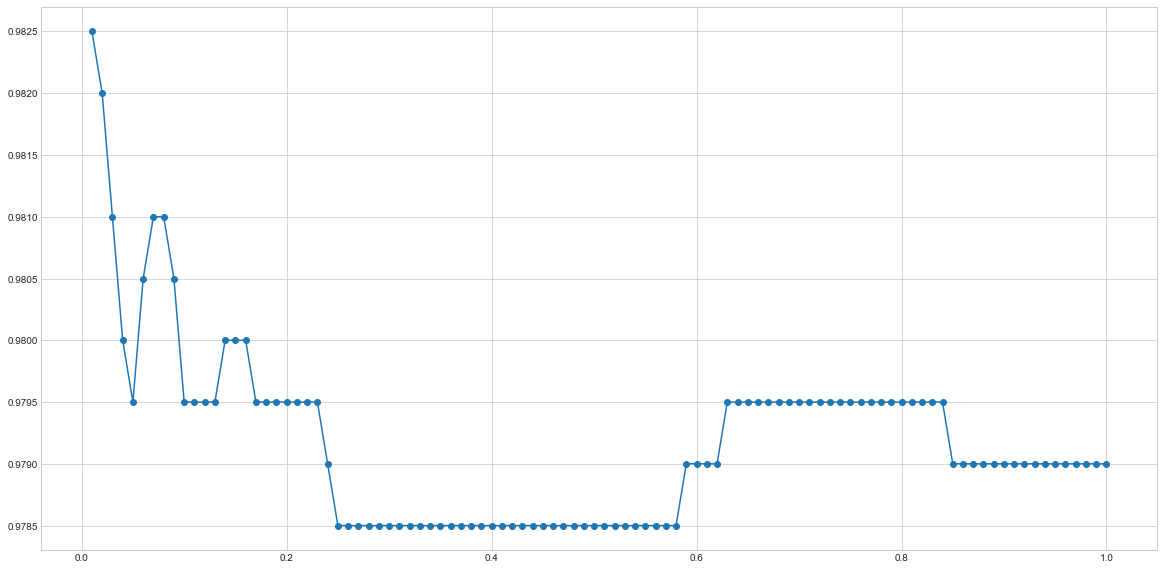

In [78]:
plt.figure(figsize=(20,10))
plt.plot(C_list_linear, results_SVM_linear['mean_test_score'], 'o-')
plt.show()

### Deuxième essai

In [79]:
C_list_linear = np.linspace(0.001, 0.01, 10**2)

parameters_linear = {'C': C_list_linear}
skf = StratifiedKFold(n_splits=10, shuffle = True)
model_SVM_linear = SVC(kernel = "linear")
grid_SVM_linear = GridSearchCV(estimator=model_SVM_linear, param_grid=parameters_linear, scoring = 'accuracy', cv = skf)
grid_SVM_linear.fit(X, y)

print("Meilleure accuracy moyenne obtenue sur le test:",grid_SVM_linear.best_score_, "\n")
print("Paramètre optimal:",grid_SVM_linear.best_params_, "\n")
print("Modèle correspondant:\n", grid_SVM_linear.best_estimator_)

Meilleure accuracy moyenne obtenue sur le test: 0.9845 

Paramètre optimal: {'C': 0.008818181818181819} 

Modèle correspondant:
 SVC(C=0.008818181818181819, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


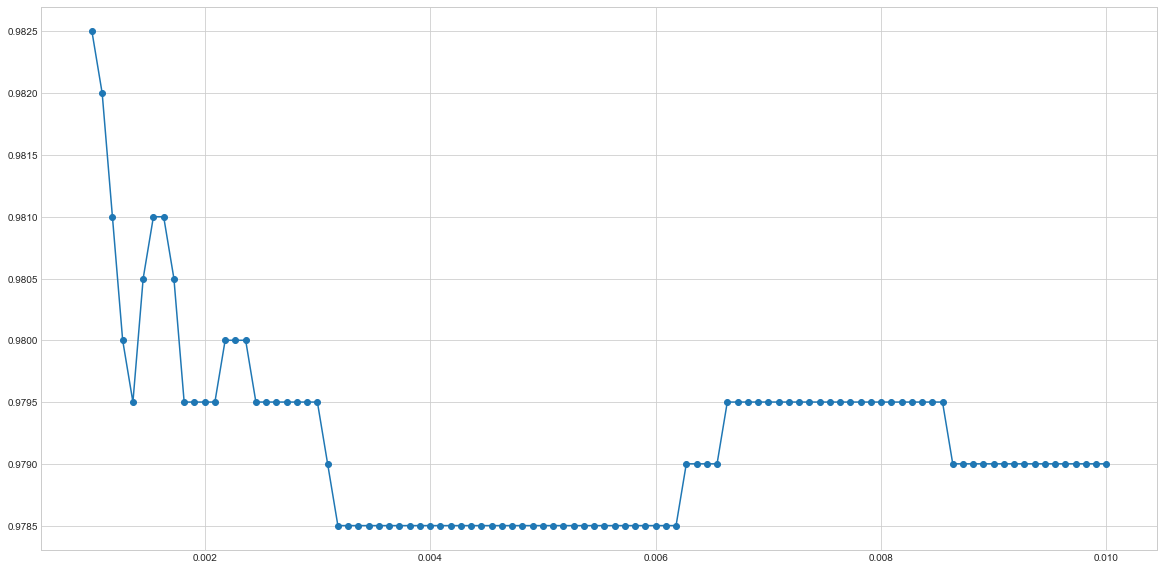

In [80]:
plt.figure(figsize=(20,10))
plt.plot(C_list_linear, results_SVM_linear['mean_test_score'], 'o-')
plt.show()

### Conclusion pour le modèle SVM avec noyau linéaire

Pour le modèle SVM avec noyau linéaire, avec $C \in [10^{-3}~;~10^{-2}]$, on a réussi à choisir une valeur de $C$ qui nous donne une accuracy moyenne sur le test de 98,45%, ce qui est supérieur au résultat annoncé sur l'article.

## Noyau polynomial

On stocke toutes les valeurs de $C$ et de $degree$ qu'on va tester dans des listes.

In [81]:
C_list_poly = np.linspace(0.05, 0.1, 2)
print(C_list_poly)

[0.05 0.1 ]


In [82]:
degree_list_poly = np.linspace(3, 4, 2)
print(degree_list_poly)

[3. 4.]


On va utiliser la fonction GridSearchCV pour parcourir toutes les combinaisons possibles de $C$ et de $degree$ (construites à partir des éléments de leurs listes respectives), et choisir la combinaison optimale. On choisit encore une fois un 10-fold Cross-Validation pour suivre la démarche de l'article.

Au préalable, on veille à stocker la liste des paramètres $C$ et $degree$ dans un dictionnaire.

In [83]:
parameters_poly = {'C': C_list_poly, 'degree': degree_list_poly}
print(parameters_poly)
skf = StratifiedKFold(n_splits=10, shuffle = True)
model_SVM_poly = SVC(kernel = 'poly')

{'C': array([0.05, 0.1 ]), 'degree': array([3., 4.])}


In [84]:
grid_SVM_poly = GridSearchCV(estimator=model_SVM_poly, param_grid=parameters_poly, scoring = 'accuracy', cv = skf)

On affiche la meilleure accuracy moyenne obtenue sur le test, la (première) combinaison de $C$ et de $degree$ qui réalise ce maximum et le modèle SVM correspondant.

In [85]:
grid_SVM_poly.fit(X, y)

print("Meilleure accuracy moyenne obtenue sur le test:",grid_SVM_poly.best_score_, "\n")
print("Paramètres optimaux:",grid_SVM_poly.best_params_, "\n")
print("Modèle correspondant:\n", grid_SVM_poly.best_estimator_)

Meilleure accuracy moyenne obtenue sur le test: 0.976 

Paramètres optimaux: {'C': 0.05, 'degree': 4.0} 

Modèle correspondant:
 SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4.0, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


On affiche l'accuracy moyenne sur le test obtenue pour chaque combinaison de $C$ et de $degree$ (construites à partir des éléments de leurs listes respectives).

In [86]:
results_SVM_poly = grid_SVM_poly.cv_results_
print(results_SVM_poly['mean_test_score'], "\n")

[0.9725 0.976  0.9725 0.976 ] 



On va maintenant afficher nos résultats sous la forme d'un heatmap.

Pour cela, on stocke les résultats obtenus array puis dans un DataFrame (pour plus de lisibilité, car on peut nommer les colonnes, mais aussi pour pouvoir utiliser la fonction pivot).

On utilise ensuite la fonction pivot pour obtenir un nouveau DataFrame qui, à chaque combinaison de $C$ et de $degree$ affiche l'accuracy moyenne sur le test du modèle SVM (avec noyau polynomial) correspondant.

C'est ce DataFrame qu'on va utiliser pour construire le heatmap.

In [87]:
axes_poly = np.array([results_SVM_poly['param_C'], results_SVM_poly['param_degree'], results_SVM_poly['mean_test_score']])
axes_poly = np.transpose(axes_poly)
axes_poly = pd.DataFrame(axes_poly, columns = ["C", "degree", "accuracy"])
print(axes_poly)

      C degree accuracy
0  0.05      3   0.9725
1  0.05      4    0.976
2   0.1      3   0.9725
3   0.1      4    0.976


In [88]:
heatmap_poly = axes_poly.pivot(index = 'C', columns = 'degree', values = 'accuracy')
heatmap_poly = heatmap_poly.apply(pd.to_numeric) # pour éviter le message d'erreur sur la fonction sns.heatmap
print(heatmap_poly)

degree     3.0    4.0
C                    
0.05    0.9725  0.976
0.10    0.9725  0.976


On se sert du package seaborn pour créer le heatmap.

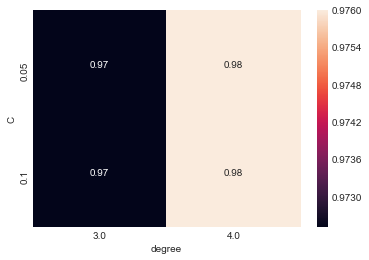

In [89]:
sns.heatmap(heatmap_poly, annot=True)

### Conclusion pour le modèle SVM avec noyau polynomial

Pour le modèle SVM avec noyau polynomial, avec $C \in \{5 \times 10^{-2}~;~10^{-1}\}$ et $3 \leqslant degree \leqslant 4$, on a réussi à choisir une valeur de $C$ et de $\gamma$ qui nous donnent une accuracy moyenne de plus de 97,6% sur le test, ce qui est à nouveau supérieur au résultat annoncé dans l'article.

On remarque cependant que ce résultat est inférieur à celui obtenu avec le modèle SVM avec un noyau linéaire.

Je n'ai pas pu utiliser davantage de valeurs de $C$ et de $degree$ car cela demandait trop de calculs à mon ordinateur.

Je pense que pour résoudre ce problème, il faudrait trouver une autre fonction de GridSearchCV pour effectuer la même tâche de manière plus rapide.

## Noyau “radial basis function”

On stocke toutes les valeurs de $C$ et de $\gamma$ qu'on va tester dans des listes.

In [90]:
C_list_rbf = np.linspace(0.05, 0.1, 5)
print(C_list_rbf)

[0.05   0.0625 0.075  0.0875 0.1   ]


In [91]:
gamma_list_rbf = np.linspace(0.001, 0.01, 5)
print(gamma_list_rbf)

[0.001   0.00325 0.0055  0.00775 0.01   ]


On va utiliser la fonction GridSearchCV pour parcourir toutes les combinaisons possibles de $C$ et de $\gamma$ (construites à partir des éléments de leurs listes respectives), et choisir la combinaison optimale. On choisit encore une fois un 10-fold Cross-Validation pour suivre la démarche de l'article.

Au préalable, on veille à stocker la liste des paramètres $C$ et $\gamma$ dans un dictionnaire.

In [92]:
parameters_rbf = {'C': C_list_rbf, 'gamma': gamma_list_rbf}
print(parameters_rbf)
skf = StratifiedKFold(n_splits=10, shuffle = True)
model_SVM_rbf = SVC(kernel = 'rbf')

{'C': array([0.05  , 0.0625, 0.075 , 0.0875, 0.1   ]), 'gamma': array([0.001  , 0.00325, 0.0055 , 0.00775, 0.01   ])}


In [93]:
grid_SVM_rbf = GridSearchCV(estimator=model_SVM_rbf, param_grid=parameters_rbf, scoring = 'accuracy', cv = skf, n_jobs = -1)

In [94]:
grid_SVM_rbf.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([0.05  , 0.0625, 0.075 , 0.0875, 0.1   ]), 'gamma': array([0.001  , 0.00325, 0.0055 , 0.00775, 0.01   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

On affiche la meilleure accuracy moyenne obtenue sur le test, la (première) combinaison de $C$ et de $\gamma$ qui réalise ce maximum et le modèle SVM correspondant.

In [95]:
print("Meilleure accuracy moyenne obtenue sur le test:",grid_SVM_rbf.best_score_, "\n")
print("Paramètres optimaux:",grid_SVM_rbf.best_params_, "\n")
print("Modèle correspondant:\n", grid_SVM_rbf.best_estimator_)

Meilleure accuracy moyenne obtenue sur le test: 0.984 

Paramètres optimaux: {'C': 0.1, 'gamma': 0.007750000000000001} 

Modèle correspondant:
 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.007750000000000001,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


On affiche l'accuracy moyenne sur le test obtenue pour chaque combinaison de $C$ et de $\gamma$ (construites à partir des éléments de leurs listes respectives).

In [96]:
results_SVM_rbf = grid_SVM_rbf.cv_results_
print(results_SVM_rbf['mean_test_score'], "\n")

[0.9795 0.982  0.9825 0.9835 0.979  0.9805 0.9825 0.983  0.9825 0.98
 0.981  0.982  0.983  0.983  0.981  0.9815 0.982  0.983  0.9835 0.9815
 0.9805 0.982  0.983  0.984  0.9825] 



On va maintenant afficher nos résultats sous la forme d'un heatmap comme précédemment.

Pour cela, on stocke les résultats obtenus array puis dans un DataFrame (pour plus de lisibilité, car on peut nommer les colonnes, mais aussi pour pouvoir utiliser la fonction pivot).

On utilise ensuite la fonction pivot pour obtenir un nouveau DataFrame qui, à chaque combinaison de $C$ et de $\gamma$ affiche l'accuracy moyenne sur le test du modèle SVM (avec noyau "radial basis function") correspondant.

C'est ce DataFrame qu'on va utiliser pour construire le heatmap.

In [97]:
axes_rbf = np.array([results_SVM_rbf['param_C'], results_SVM_rbf['param_gamma'], results_SVM_rbf['mean_test_score']]) 
axes_rbf = np.transpose(axes_rbf)
axes_rbf = pd.DataFrame(axes_rbf, columns = ["C", "gamma", "accuracy"])
print(axes_rbf)

         C    gamma accuracy
0     0.05    0.001   0.9795
1     0.05  0.00325    0.982
2     0.05   0.0055   0.9825
3     0.05  0.00775   0.9835
4     0.05     0.01    0.979
5   0.0625    0.001   0.9805
6   0.0625  0.00325   0.9825
7   0.0625   0.0055    0.983
8   0.0625  0.00775   0.9825
9   0.0625     0.01     0.98
10   0.075    0.001    0.981
11   0.075  0.00325    0.982
12   0.075   0.0055    0.983
13   0.075  0.00775    0.983
14   0.075     0.01    0.981
15  0.0875    0.001   0.9815
16  0.0875  0.00325    0.982
17  0.0875   0.0055    0.983
18  0.0875  0.00775   0.9835
19  0.0875     0.01   0.9815
20     0.1    0.001   0.9805
21     0.1  0.00325    0.982
22     0.1   0.0055    0.983
23     0.1  0.00775    0.984
24     0.1     0.01   0.9825


In [98]:
heatmap_rbf = axes_rbf.pivot(index = 'C', columns = 'gamma', values = 'accuracy')
heatmap_rbf = heatmap_rbf.apply(pd.to_numeric)
print(heatmap_rbf)

gamma   0.00100  0.00325  0.00550  0.00775  0.01000
C                                                  
0.0500   0.9795   0.9820   0.9825   0.9835   0.9790
0.0625   0.9805   0.9825   0.9830   0.9825   0.9800
0.0750   0.9810   0.9820   0.9830   0.9830   0.9810
0.0875   0.9815   0.9820   0.9830   0.9835   0.9815
0.1000   0.9805   0.9820   0.9830   0.9840   0.9825


On se sert du package seaborn pour créer le heatmap.

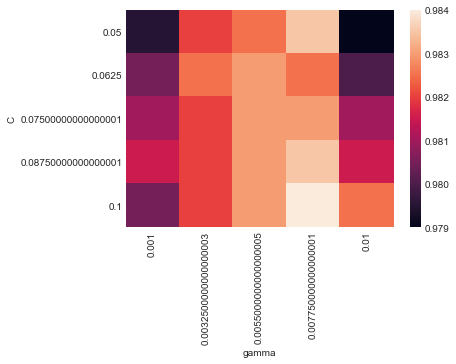

In [99]:
sns.heatmap(heatmap_rbf)

### Conclusion pour le modèle SVM avec noyau "radial basis function"

Pour le modèle SVM avec noyau "radial basis function", avec $C \in [5 \times 10^{-2}~;~10^{-1}]$ et $\gamma \in [10^{-3}~;~10^{-2}]$, on a réussi à choisir une valeur de $C$ et de $\gamma$ qui nous donnent une accuracy moyenne sur le test de 98,4%, ce qui est à nouveau supérieur au résultat annoncé dans l'article.

De plus, ce résultat est légèrement moins bon que celui obtenu avec le modèle SVM avec noyau linéaire, mais il est meilleur que celui obtenu avec le modèle SVM avec noyau polynomial.

On conclut qu'à priori, le modèle SVM avec noyau linéaire semble être le meilleur parmi les trois pour ce jeu de données. Il faudrait cependant effectuer davantage de calcul avec le modèle SVM avec noyau polynomial pour essayer de trouver une meilleure combinaison que celle obtenue précédemment.

<a id="5"></a> 
 
# 5. Discussion / Conclusion (5 pts)

On peut conclure que les auteurs de l'article ne décrivent pas suffisament leur démarche.

En effet, ils ont simplement indiqué qu'ils ont effectué un 10-fold Cross-Validation sur les modèles SVM et Naive Bayes.

Pour le modèle Naive Bayes, en reproduisant cette démarche, on obtient une accuracy moyenne sur le test plus élevée que celle indiquée dans l'article. Comme on ne sait pas davantage comment ils ont procédé, il est difficile de comprendre à quoi est dû cette différence. Peut être qu'ils n'ont pas travaillé sur le jeu de données dans son ensemble, où qu'ils ont choisi des paramètres différents des notres (on a utilisé les paramètres par défaut ici).

Pour le modèle SVM, on n'a aucune information sur les paramètres du modèle.
On ne sait pas quel noyau a été utilisé par exemple, ni la valeur de C, de degree ou de gamma.
De plus, on obtient également une accuracy moyenne sur le test plus élevée que celle indiquée sur l'article pour tout nos essais sur ce modèle. De même ici, je pense qu'ils n'ont peut être pas travaillé sur l'ensemble du jeu de données car cela expliquerait l'accuracy moyenne plus basse (avec une taille du train plus petite, on obtiendrait sûrement une accuracy plus petite sur le test).

La dernière possibilité est qu'ils aient affiché l'accuracy moyenne sur les données de train et non sur celles de test test, mais je ne vois pas l'intérêt de cette démarche, car c'est l'aspect prédictif du modèle qui nous intéresse (la performance sur le train est donc beaucoup moins intéressante que celle sur le test).
L'article ne précise pas laquelle des deux est affichée, alors j'ai supposé qu'il s'agissait de celle sur les données de test.

Enfin, parmi tous les modèles qu'on a testé ici, le meilleur en terme d'accuracy moyenne sur les données de test est le modèle kNN avec 6 voisins. En effet, on a réussi à atteindre une accuracy moyenne sur les données de test de 98,65% pour ce modèle. Néanmoins, les modèles Naive Bayes et SVM avec noyau linéaire donnent une accuracy moyenne sur les données de test très proche de celle valeur.

J'ai répété plusieurs fois le 10-fold Cross-Validation pour ces trois modèles et en général, l'accuracy moyenne sur les données de test la plus grande est celle du modèle kNN avec 6 voisins, même si les valeurs obtenues sur les trois modèles sont très proches.

Pour décider entre ces modèles, je pense qu'il faudrait utiliser d'autres scores en plus de l'accuracy.